## 关于
本文件源于deep learning with python
本人利用了该文件，做出了一些翻译和个人学习的需要，主要原文件是英文的
注意：本人不是自己翻译，是使用工具，进行的翻译，并且是无脑的
本人仅仅是高一学生！您在这里看到我幼稚的语言，还请见谅！
您可以在我的博客：blog.a152.top留下宝贵的意见！

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

## 神经网络初探

本笔记本包含[使用Python进行深入学习]第2章第1节中的代码示例(https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 请注意，原文的内容要多得多，特别是进一步的解释和图表：在这个笔记本中，您只能找到源代码和相关注释。

----

我们现在来看第一个具体的神经网络示例，它使用Python库Keras来学习分类

手写数字。除非你已经有过Keras或类似库的经验，否则你不会完全理解这一点

第一个例子。你可能还没有安装Keras。别担心，那很好。在下一章中，我们将

回顾我们示例中的每个元素并详细解释它们。所以不要担心，如果有些步骤似乎武断或看起来像魔术给你！

我们得从某个地方开始。

我们这里要解决的问题是将手写数字（28像素乘28像素）的灰度图像分为10类

类别（0到9）。我们将使用的数据集是MNIST数据集，这是机器学习社区中的一个经典数据集

它的存在时间几乎和这个领域本身一样长，并且已经被非常深入地研究过。这是一组6万张训练图像，加上1万次测试

图片，由美国国家标准与技术研究所（NIST）在20世纪80年代组装。你可以考虑“解决”问题

作为深度学习的“你好世界”，你要做的就是验证你的算法是否按预期工作。当你变成机器

学习实践者，你会看到MNIST一次又一次地出现在科学论文、博客文章等中。

MNIST数据集以Keras预加载，以一组四个Numpy数组的形式：

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_ images`和`train_ labels`构成“training set”，即模型将从中学习的数据。然后，模型将在计算机上进行测试

“测试集”、“测试图像”和“测试标签”。我们的图像被编码为Numpy数组，标签只是一个数字数组，范围很广

从0到9。图像和标签之间有一对一的对应关系。

我们来看看培训数据：

In [3]:
train_images.shape
#训练数据

(60000, 28, 28)

In [4]:
len(train_labels)
#训练标签的长度

60000

In [5]:
train_labels
#训练标签

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

我们来看看测试数据：

In [6]:
test_images.shape
#测试数据

(10000, 28, 28)

In [7]:
len(test_labels)
#测试标签

10000

In [8]:
test_labels
#测试标签

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

我们的工作流程如下：首先，我们将用训练数据、 `train_images`和`train_labels`呈现我们的神经网络。这个

网络将学习如何将图像和标签联系起来。最后，我们将要求网络对`test_images`进行预测，然后

将验证这些预测是否与`test_ labels`中的标签匹配。

让我们来建立我们的网络——再次，记住，您还不应该了解这个示例的所有内容。

## 注意！
原文件使用的是
`network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))`
本人为了研究网络大小影响，在这里做了修改！

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


神经网络的核心组成部分是“层”，一个数据处理模块，你可以把它想象成数据的“过滤器”。一些

数据以更有用的形式输入和输出。准确地说，层从输入到层中的数据中提取表示——希望如此

对当前问题更有意义的表示。大多数深度学习实际上都是将简单的层链接在一起

它将实现一种渐进式的“数据蒸馏”。深度学习模型就像数据处理的筛子，由

一系列不断完善的数据过滤器——“层”。

在这里，我们的网络由两个`Dense`层组成，这两个层是密集连接（也称为“完全连接”）的神经层。

第二层（也是最后一层）是一个10路“softmax”层，这意味着它将返回一个包含10个概率分数（总和为1）的数组。每个

分数将是当前数字图像属于我们的10位类之一的概率。

为了使我们的网络为培训做好准备，我们还需要选择三件事，作为“汇编”步骤的一部分：

*损失函数：是指网络将如何衡量它在训练数据上的表现，从而衡量它的表现

能够把自己引向正确的方向。

*优化器：这是一种机制，通过这种机制，网络将根据所看到的数据及其丢失功能进行自我更新。

*培训和测试期间要监控的指标。在这里，我们只关心准确度（正确的图像部分）

分类）。

损失函数和优化器的确切用途将在接下来的两章中阐明。

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

在训练之前，我们将对数据进行预处理，将其重塑为网络所期望的形状，并对其进行缩放，使所有值都处于最佳状态

`[0，1]`间隔。例如，以前，我们的训练图像存储在一个`（60000，28，28）`类型为`uint8`的数组中

`[0，255]`间隔中的值。我们把它转换成一个`（60000，28*28）`的`float32`数组，其值介于0和1之间。

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

我们还需要对标签进行分类编码，这一步我们将在第3章中解释：
这是书上原文，可能没有第三章了~~~

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

我们现在已经准备好训练我们的网络，在Keras中，这是通过调用网络的“fit”方法来完成的：

我们将模型“拟合”到其训练数据中。

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 20s 330us/step - loss: 0.2178 - acc: 0.9341
Epoch 2/5
60000/60000 [==============================] - 20s 331us/step - loss: 0.0796 - acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0513 - acc: 0.9844
Epoch 4/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0364 - acc: 0.9889
Epoch 5/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0263 - acc: 0.9915


在训练期间显示两个量：训练数据上网络的“丢失”和训练数据上网络的准确性

训练数据。

训练数据的准确率很快达到0.989（98.9%）。现在，让我们检查一下我们的模型在测试集上的性能：

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 151us/step


In [15]:
print('test_acc:', test_acc)

test_acc: 0.9798


我们的测试集准确率是97.8%——这比训练集的准确率要低很多。

训练精度和测试精度之间的差距就是“过度拟合”的一个例子，

事实上，机器学习模型在新数据上的表现往往比在训练数据上差。

过度装修将是第三章的中心话题。

我们的第一个例子到此结束——你们刚刚看到我们如何建立和训练一个神经网络来分类手写数字，在

少于20行Python代码。在下一章中，我们将详细讨论刚才预演的每一个动作片段，并阐明真正的意义

在幕后进行。您将了解“张量”，即存储进入网络的对象的数据，以及张量运算，这些运算

层是由，和关于梯度下降，这使我们的网络可以从其训练的例子学习。

# 关于下面

下面是本人的一些小实验！
我会介绍的！
在执行下面代码之前，需要先完成上面的训练！

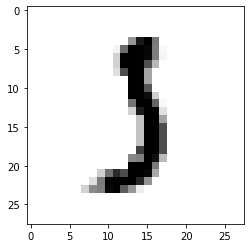

预测值：3
正确值：5


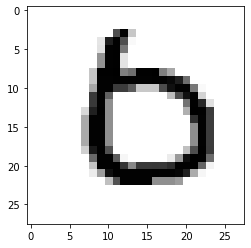

预测值：0
正确值：6


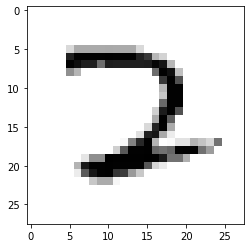

预测值：7
正确值：2


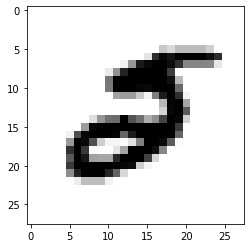

预测值：2
正确值：5


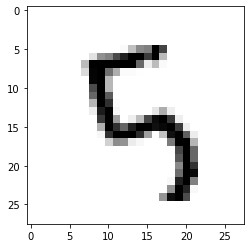

预测值：9
正确值：5


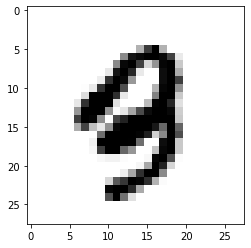

预测值：9
正确值：3


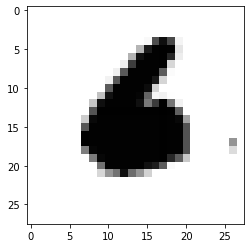

预测值：4
正确值：6


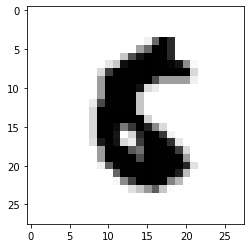

预测值：5
正确值：8


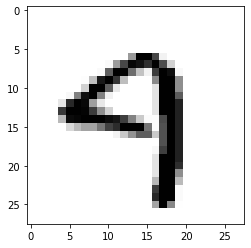

预测值：9
正确值：4


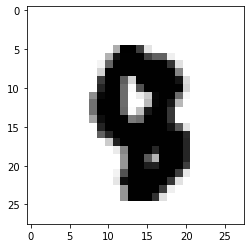

预测值：9
正确值：8


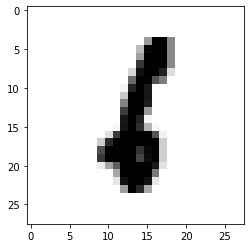

预测值：1
正确值：6


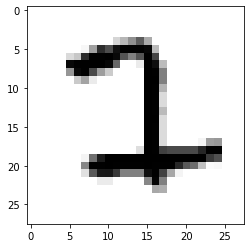

预测值：2
正确值：7


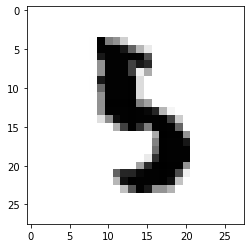

预测值：3
正确值：5


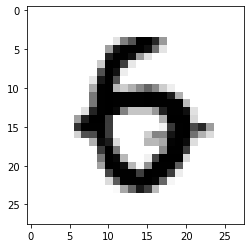

预测值：0
正确值：6


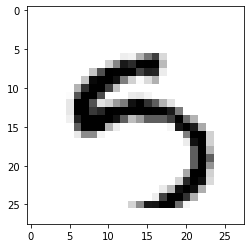

预测值：9
正确值：5


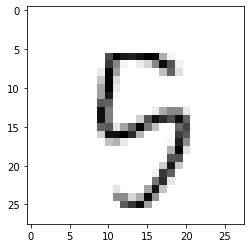

预测值：9
正确值：5


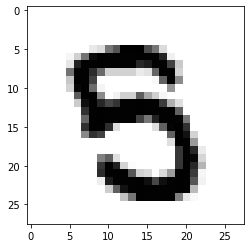

预测值：3
正确值：5


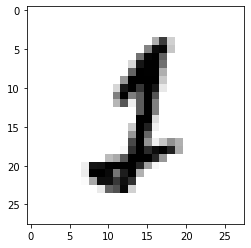

预测值：3
正确值：2


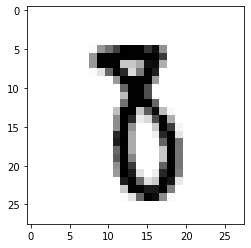

预测值：3
正确值：8


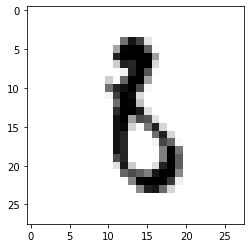

预测值：1
正确值：8


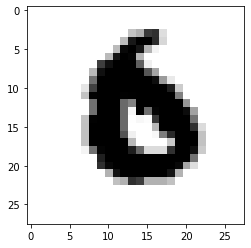

预测值：0
正确值：6


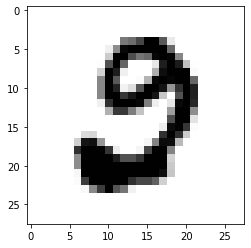

预测值：3
正确值：2


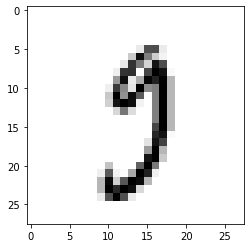

预测值：3
正确值：9


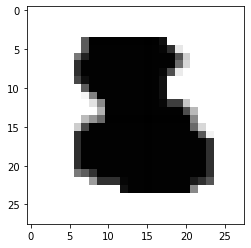

预测值：3
正确值：8


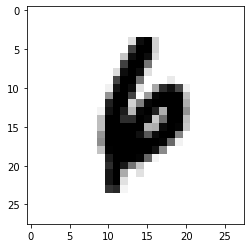

预测值：4
正确值：6


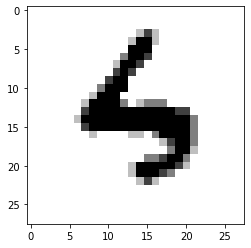

预测值：4
正确值：5


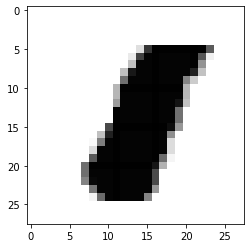

预测值：8
正确值：1


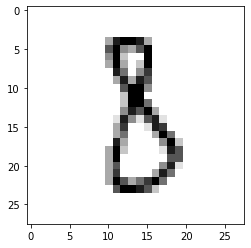

预测值：3
正确值：8


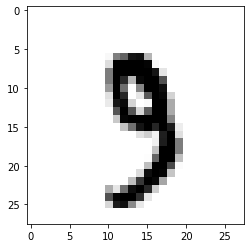

预测值：3
正确值：9


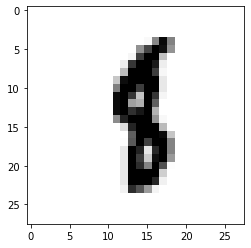

预测值：1
正确值：8


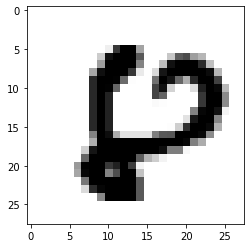

预测值：0
正确值：8


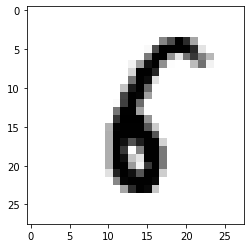

预测值：5
正确值：6


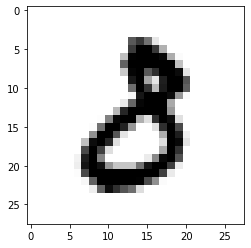

预测值：3
正确值：8


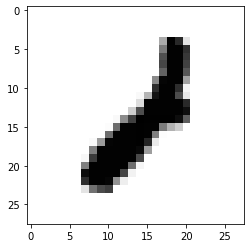

预测值：1
正确值：2


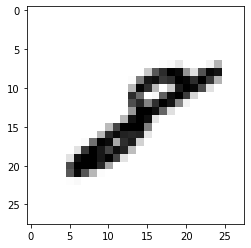

预测值：1
正确值：8


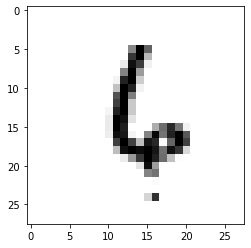

预测值：4
正确值：6


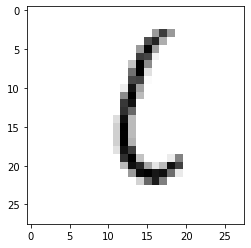

预测值：1
正确值：6


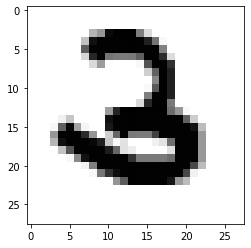

预测值：2
正确值：3


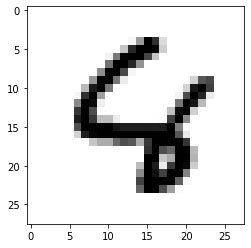

预测值：9
正确值：8


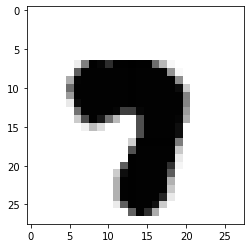

预测值：9
正确值：7


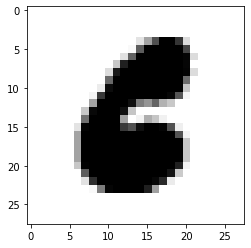

预测值：0
正确值：6


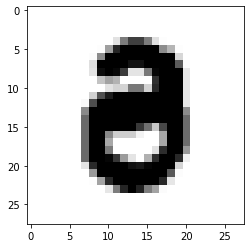

预测值：3
正确值：8


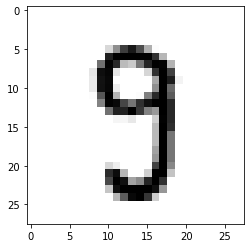

预测值：9
正确值：3


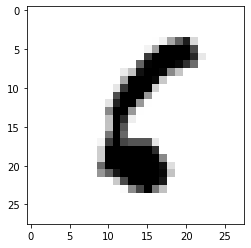

预测值：5
正确值：6


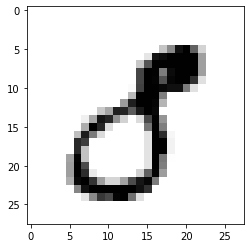

预测值：3
正确值：8


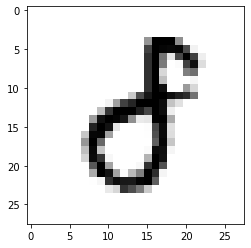

预测值：3
正确值：8


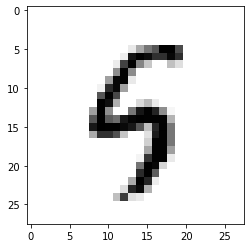

预测值：9
正确值：5


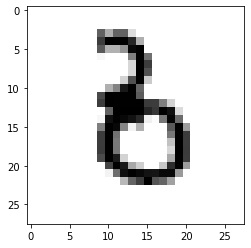

预测值：3
正确值：6


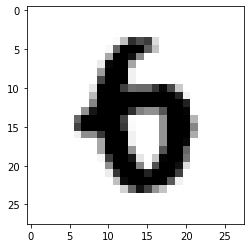

预测值：0
正确值：6


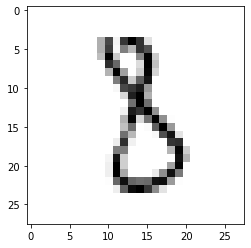

预测值：3
正确值：8


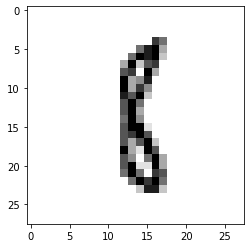

预测值：1
正确值：8


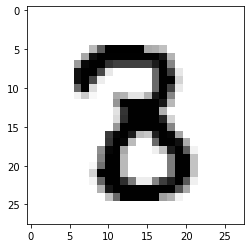

预测值：3
正确值：8


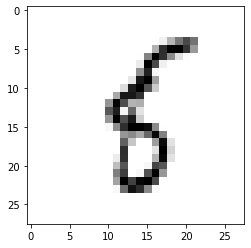

预测值：5
正确值：8


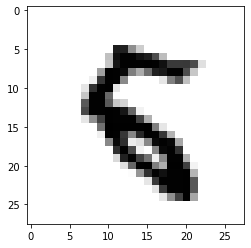

预测值：8
正确值：5


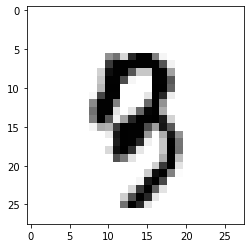

预测值：9
正确值：3


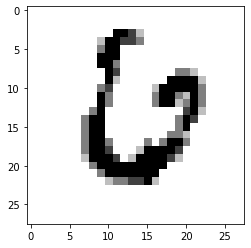

预测值：0
正确值：6


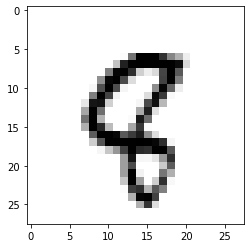

预测值：9
正确值：8


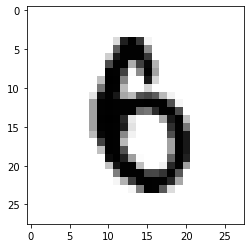

预测值：0
正确值：6


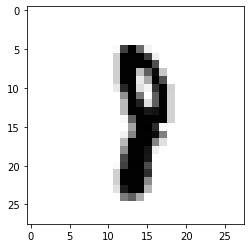

预测值：1
正确值：8


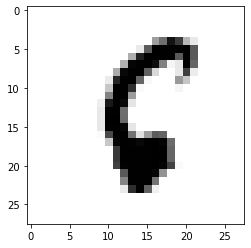

预测值：5
正确值：6


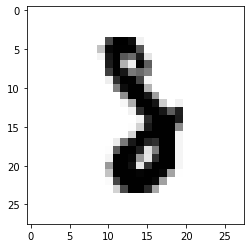

预测值：3
正确值：8


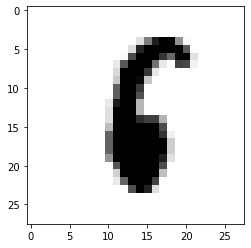

预测值：5
正确值：6


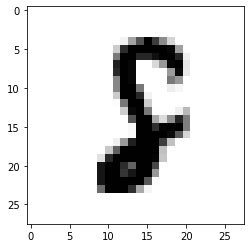

预测值：5
正确值：8


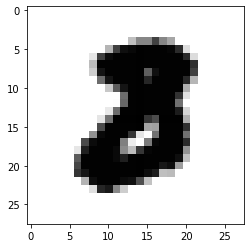

预测值：3
正确值：8


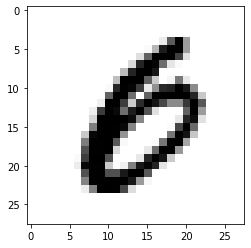

预测值：0
正确值：6


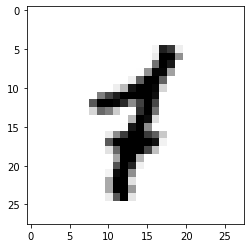

预测值：1
正确值：7


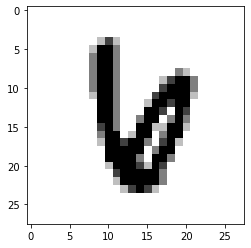

预测值：4
正确值：6


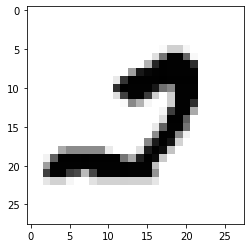

预测值：3
正确值：2


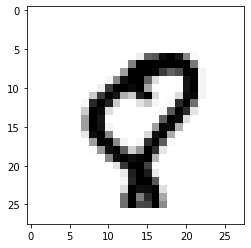

预测值：9
正确值：8


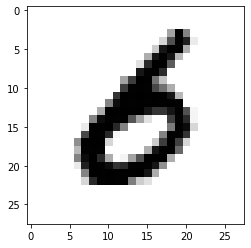

预测值：3
正确值：6


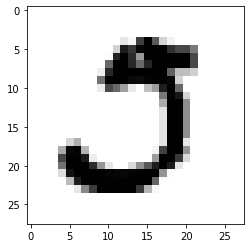

预测值：3
正确值：5


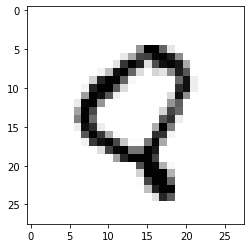

预测值：9
正确值：8


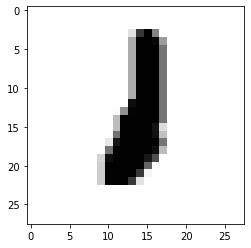

预测值：2
正确值：1


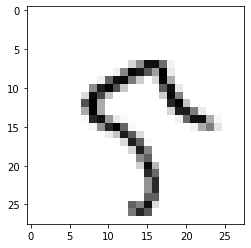

预测值：9
正确值：5


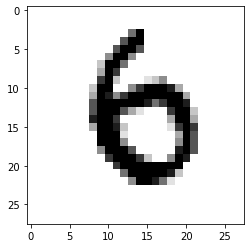

预测值：0
正确值：6


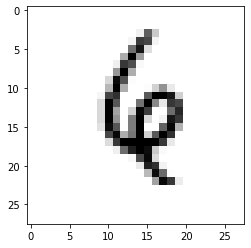

预测值：4
正确值：6


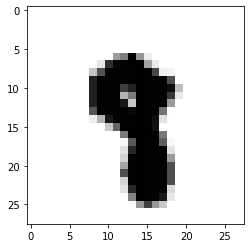

预测值：9
正确值：8


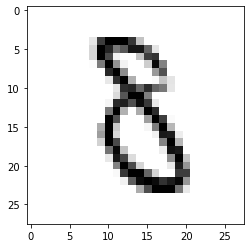

预测值：3
正确值：8


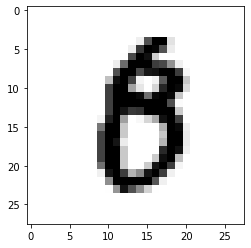

预测值：0
正确值：8


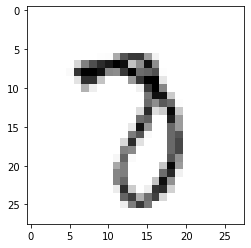

预测值：3
正确值：8


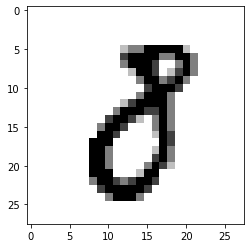

预测值：3
正确值：8


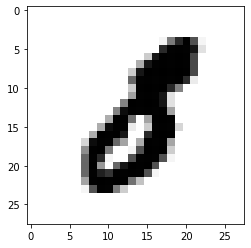

预测值：3
正确值：8


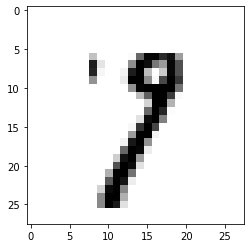

预测值：7
正确值：9


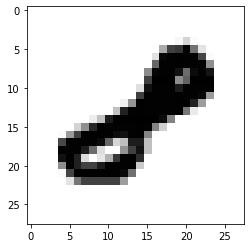

预测值：3
正确值：8


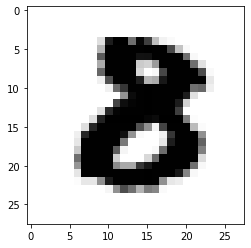

预测值：3
正确值：8


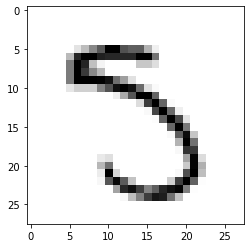

预测值：3
正确值：5


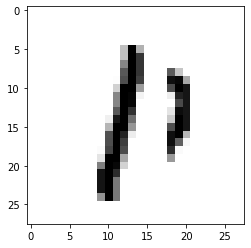

预测值：0
正确值：1


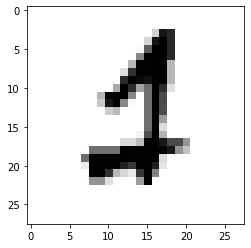

预测值：3
正确值：1


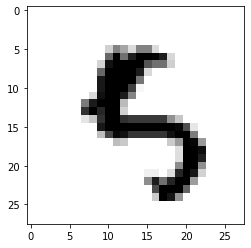

预测值：3
正确值：5


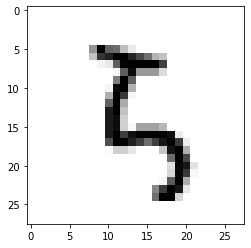

预测值：3
正确值：5


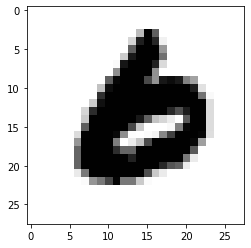

预测值：0
正确值：6


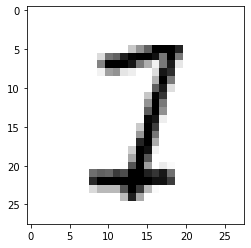

预测值：1
正确值：7


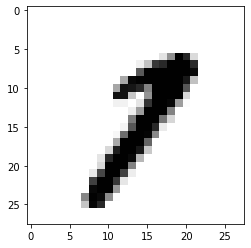

预测值：7
正确值：1


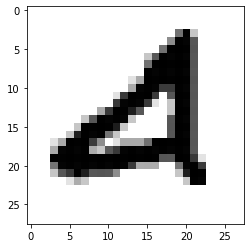

预测值：2
正确值：4


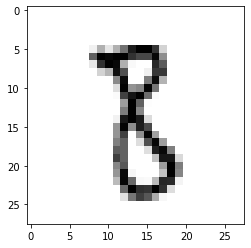

预测值：3
正确值：8


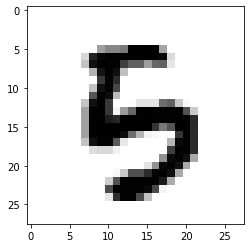

预测值：9
正确值：5


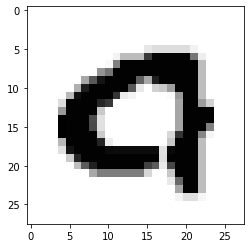

预测值：0
正确值：4


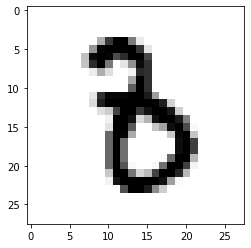

预测值：3
正确值：8


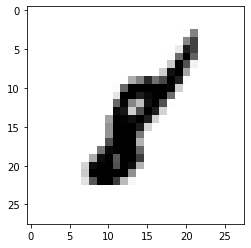

预测值：1
正确值：8


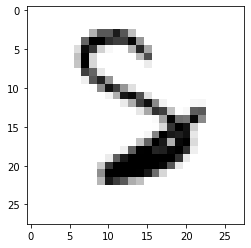

预测值：3
正确值：8


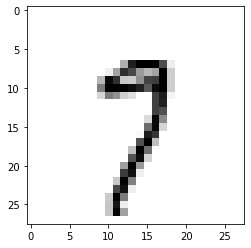

预测值：7
正确值：9


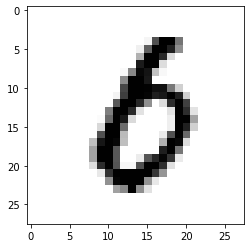

预测值：0
正确值：6


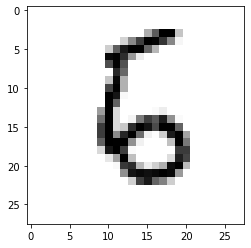

预测值：6
正确值：5


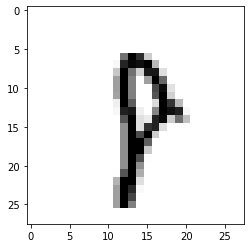

预测值：9
正确值：8


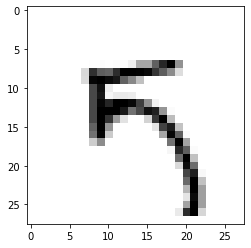

预测值：9
正确值：5


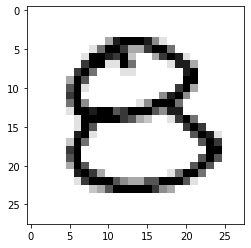

预测值：3
正确值：8


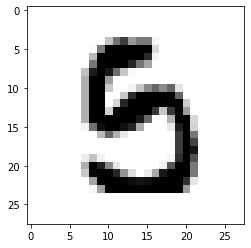

预测值：9
正确值：5


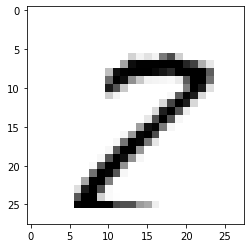

预测值：7
正确值：2


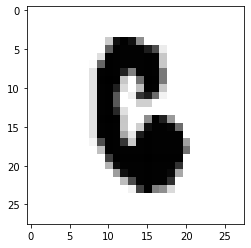

预测值：9
正确值：6


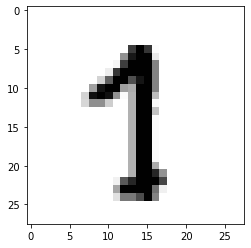

预测值：1
正确值：7


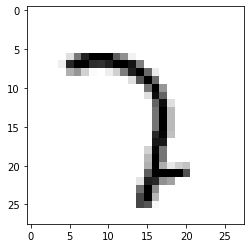

预测值：7
正确值：2


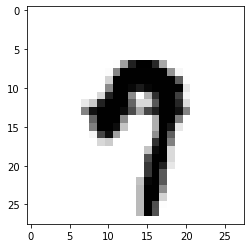

预测值：9
正确值：7


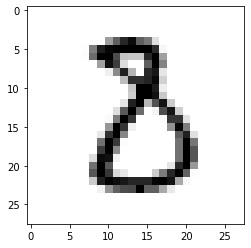

预测值：2
正确值：8


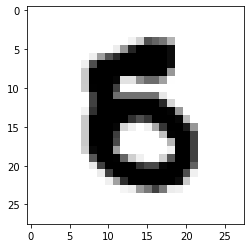

预测值：8
正确值：5


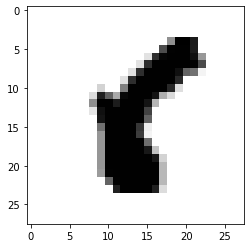

预测值：8
正确值：6


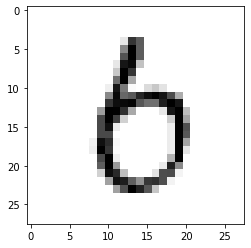

预测值：0
正确值：6


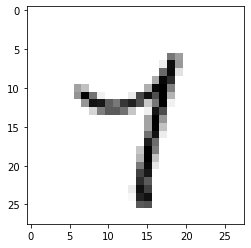

预测值：4
正确值：7


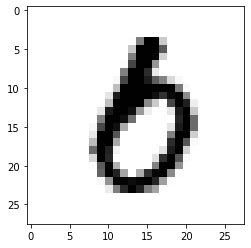

预测值：0
正确值：6


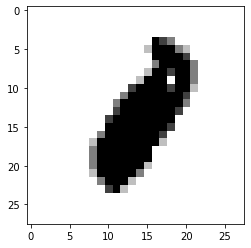

预测值：2
正确值：0


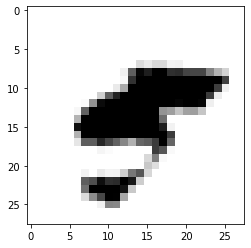

预测值：4
正确值：5


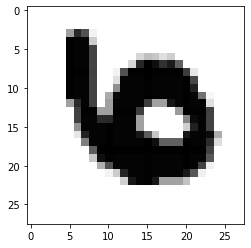

预测值：0
正确值：6


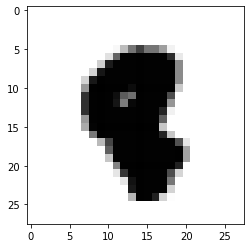

预测值：9
正确值：8


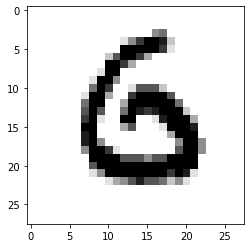

预测值：5
正确值：6


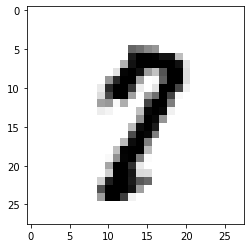

预测值：9
正确值：7


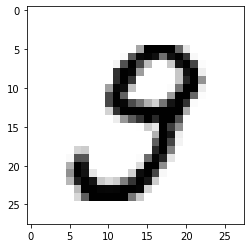

预测值：3
正确值：9


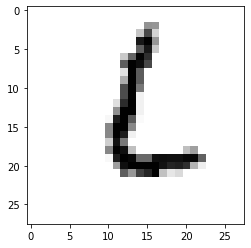

预测值：2
正确值：6


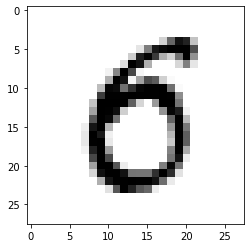

预测值：0
正确值：6


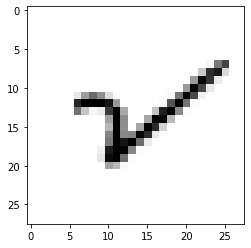

预测值：4
正确值：2


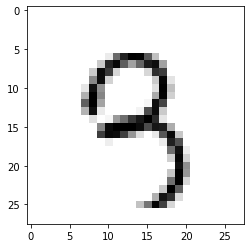

预测值：9
正确值：3


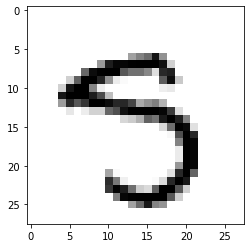

预测值：3
正确值：5


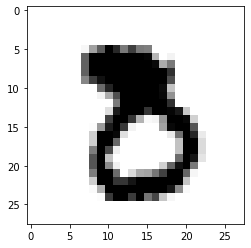

预测值：3
正确值：8


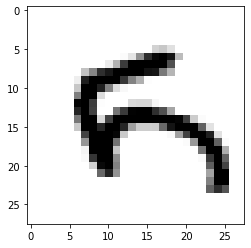

预测值：9
正确值：5


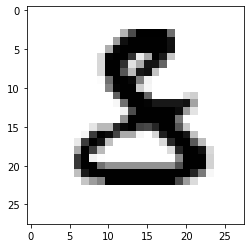

预测值：3
正确值：8


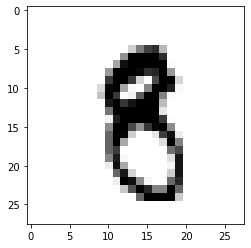

预测值：9
正确值：8


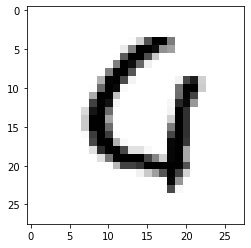

预测值：9
正确值：4


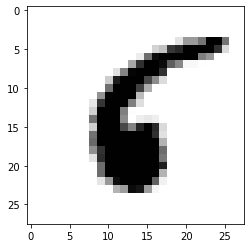

预测值：5
正确值：6


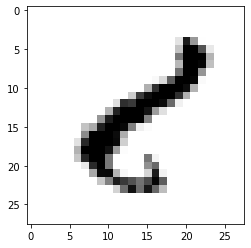

预测值：1
正确值：8


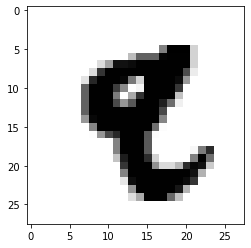

预测值：8
正确值：9


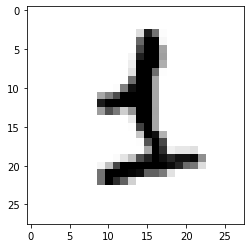

预测值：3
正确值：1


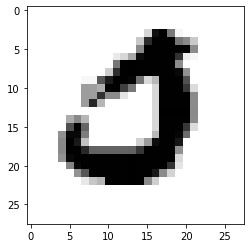

预测值：3
正确值：0


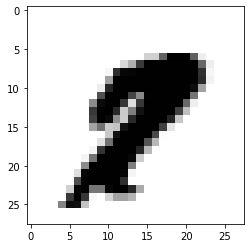

预测值：9
正确值：7


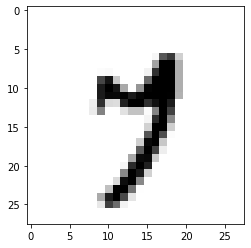

预测值：9
正确值：7


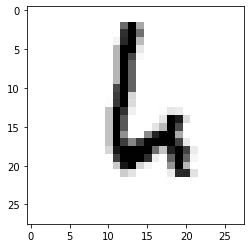

预测值：6
正确值：4


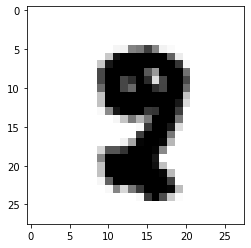

预测值：9
正确值：8


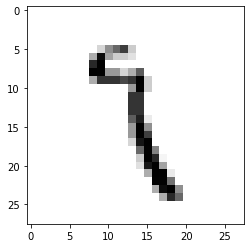

预测值：1
正确值：9


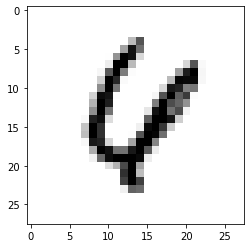

预测值：4
正确值：6


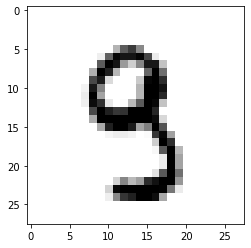

预测值：3
正确值：9


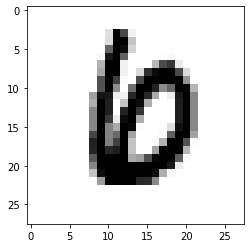

预测值：0
正确值：6


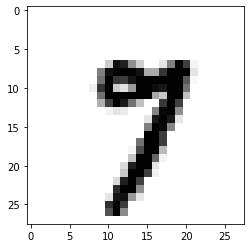

预测值：7
正确值：9


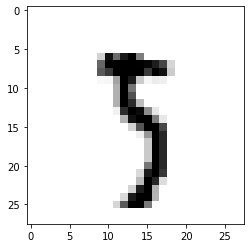

预测值：3
正确值：5


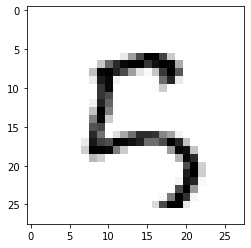

预测值：9
正确值：5


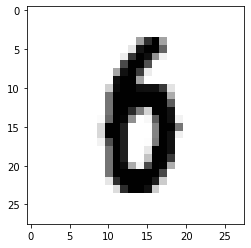

预测值：0
正确值：6


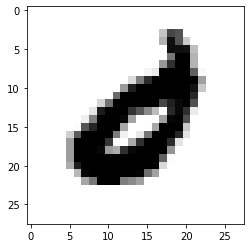

预测值：0
正确值：6


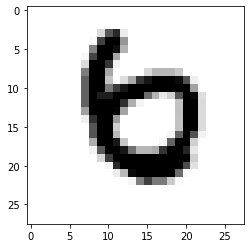

预测值：0
正确值：6


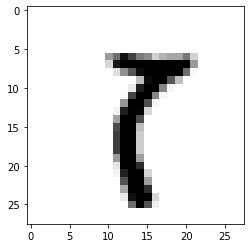

预测值：1
正确值：7


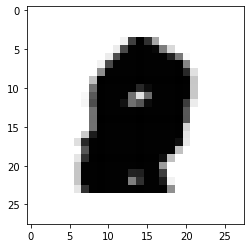

预测值：0
正确值：8


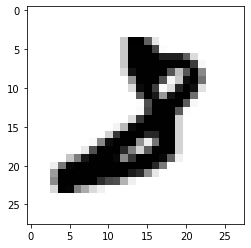

预测值：2
正确值：8


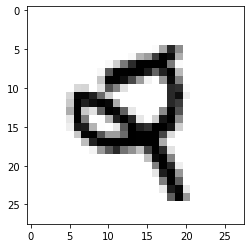

预测值：9
正确值：2


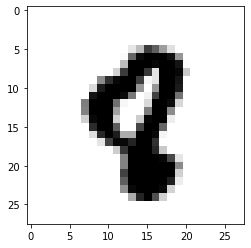

预测值：9
正确值：8


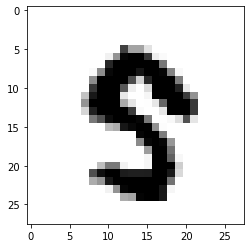

预测值：9
正确值：5


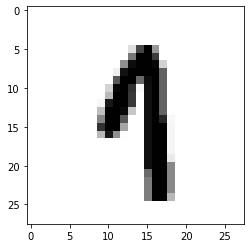

预测值：4
正确值：1


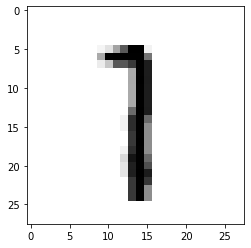

预测值：1
正确值：7


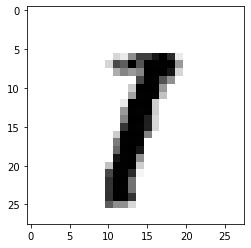

预测值：1
正确值：7


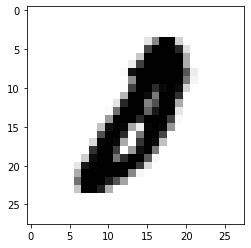

预测值：2
正确值：0


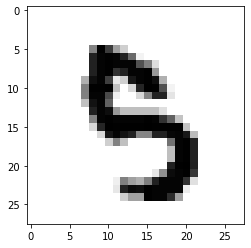

预测值：9
正确值：5


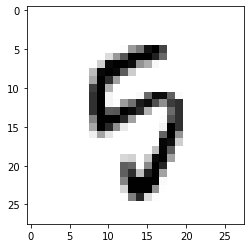

预测值：9
正确值：5


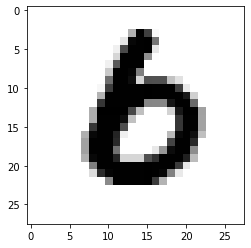

预测值：0
正确值：6


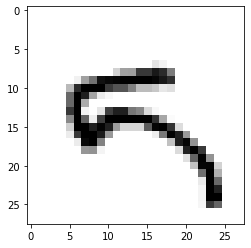

预测值：9
正确值：5


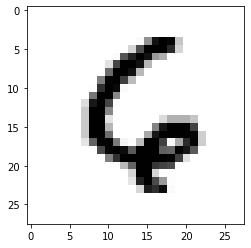

预测值：9
正确值：6


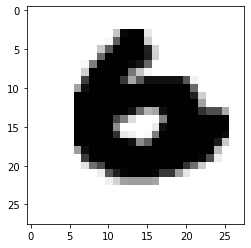

预测值：0
正确值：6


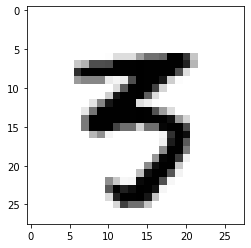

预测值：3
正确值：5


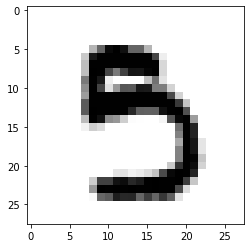

预测值：3
正确值：5


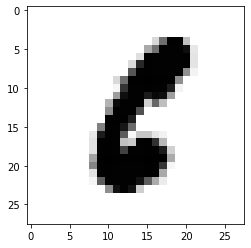

预测值：0
正确值：6


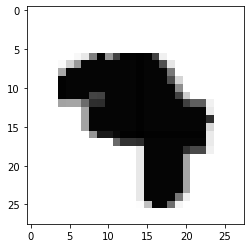

预测值：9
正确值：7


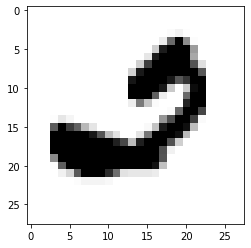

预测值：3
正确值：2


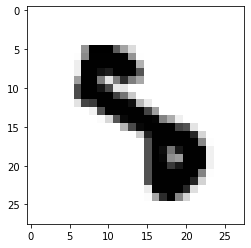

预测值：3
正确值：5


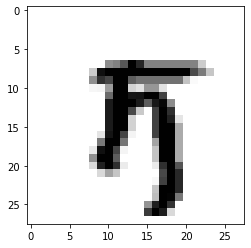

预测值：9
正确值：5


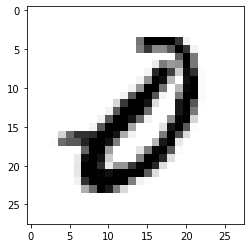

预测值：2
正确值：0


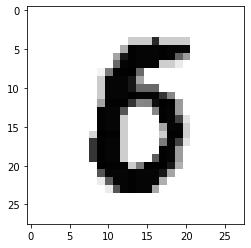

预测值：0
正确值：6


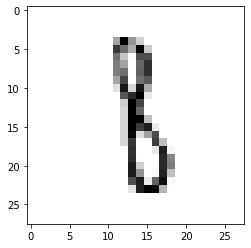

预测值：3
正确值：8


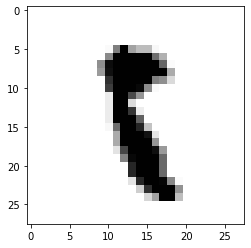

预测值：1
正确值：8


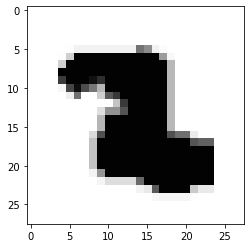

预测值：3
正确值：2


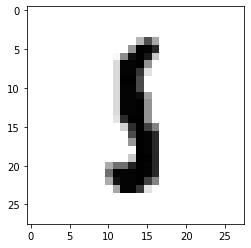

预测值：5
正确值：1


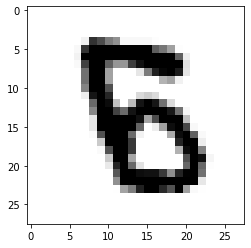

预测值：8
正确值：6


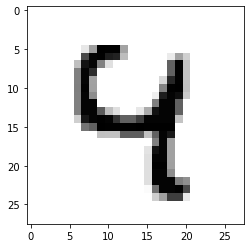

预测值：4
正确值：9


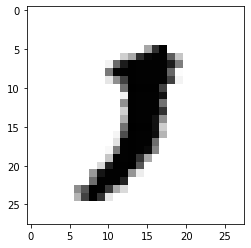

预测值：9
正确值：1


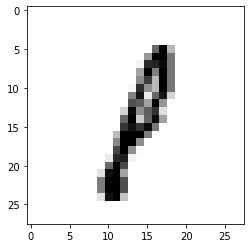

预测值：1
正确值：8


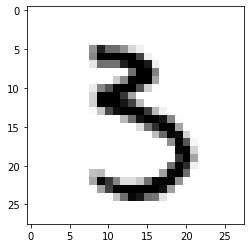

预测值：3
正确值：5


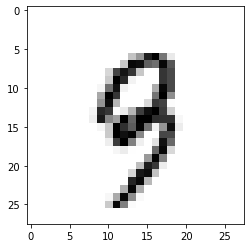

预测值：9
正确值：3


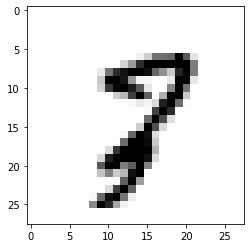

预测值：8
正确值：3


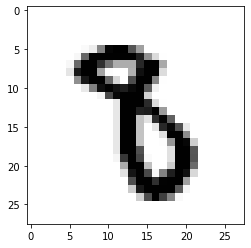

预测值：3
正确值：8


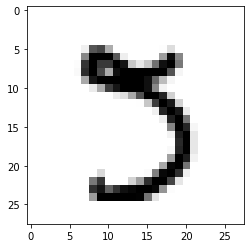

预测值：3
正确值：5


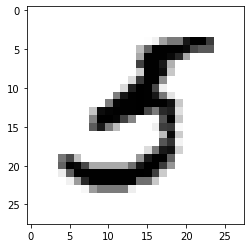

预测值：3
正确值：5


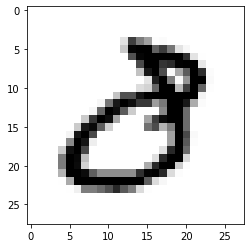

预测值：3
正确值：8


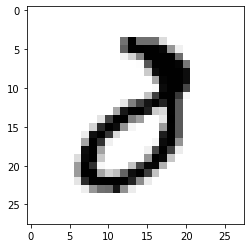

预测值：2
正确值：8


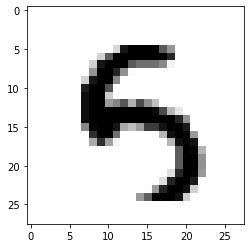

预测值：9
正确值：5


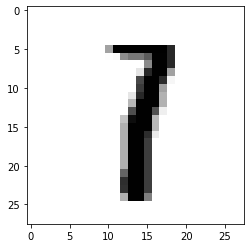

预测值：1
正确值：7


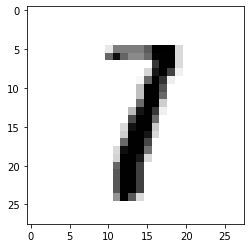

预测值：1
正确值：7


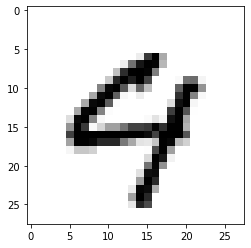

预测值：9
正确值：4


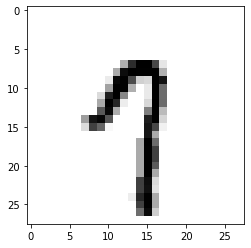

预测值：7
正确值：9


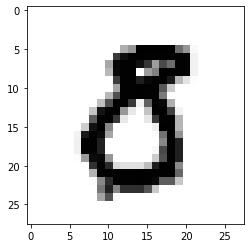

预测值：0
正确值：8


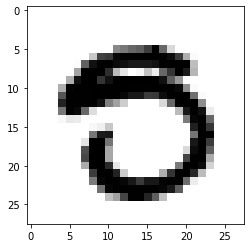

预测值：0
正确值：5


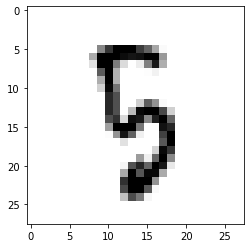

预测值：9
正确值：5


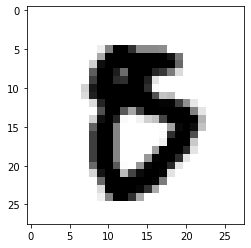

预测值：0
正确值：8


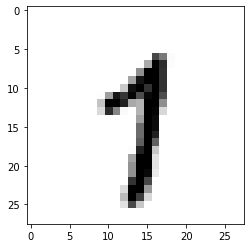

预测值：1
正确值：7


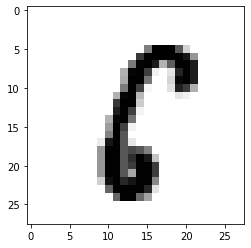

预测值：0
正确值：6


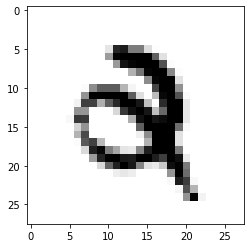

预测值：9
正确值：2


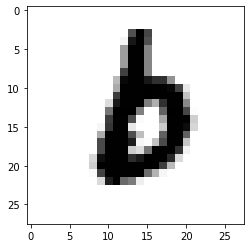

预测值：0
正确值：6


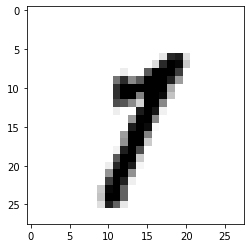

预测值：1
正确值：7


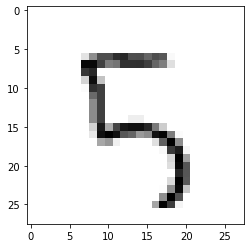

预测值：9
正确值：5


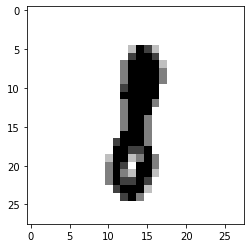

预测值：1
正确值：8


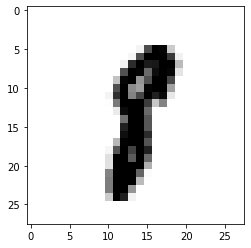

预测值：1
正确值：8


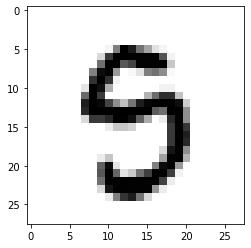

预测值：9
正确值：5


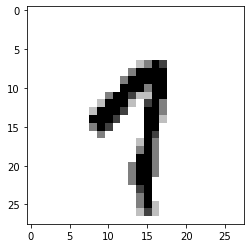

预测值：7
正确值：1


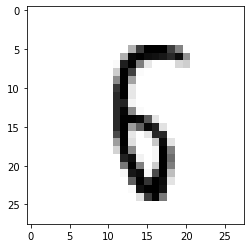

预测值：5
正确值：6


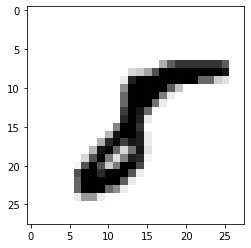

预测值：5
正确值：8


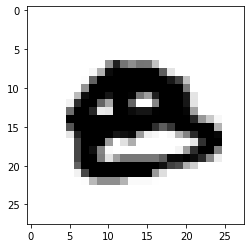

预测值：0
正确值：8


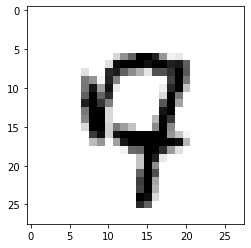

预测值：9
正确值：7


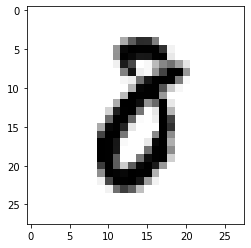

预测值：0
正确值：8


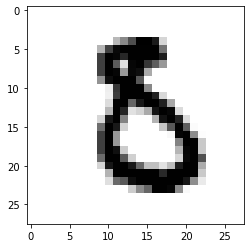

预测值：3
正确值：8


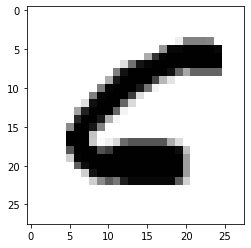

预测值：5
正确值：6


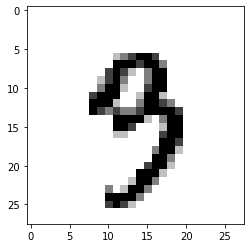

预测值：9
正确值：3


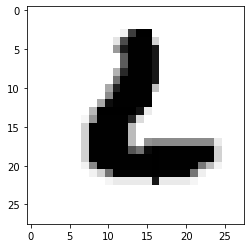

预测值：2
正确值：6


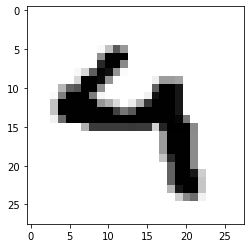

预测值：9
正确值：4


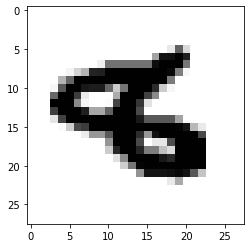

预测值：3
正确值：8


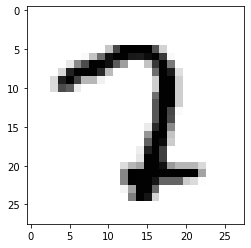

预测值：2
正确值：7


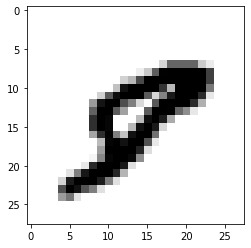

预测值：7
正确值：8


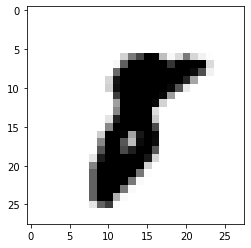

预测值：5
正确值：8


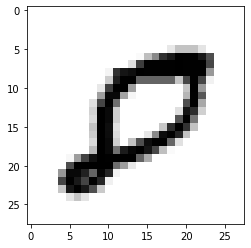

预测值：0
正确值：8


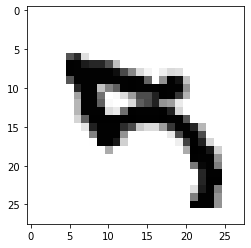

预测值：9
正确值：5


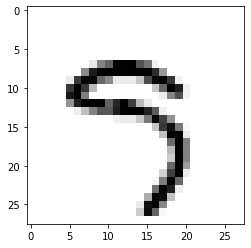

预测值：9
正确值：5


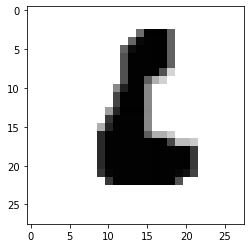

预测值：2
正确值：6


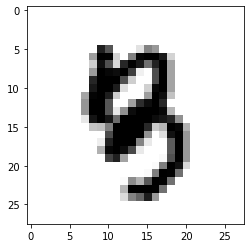

预测值：9
正确值：3


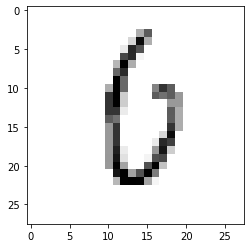

预测值：0
正确值：6


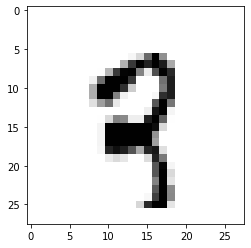

预测值：9
正确值：3


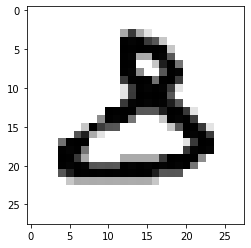

预测值：3
正确值：8


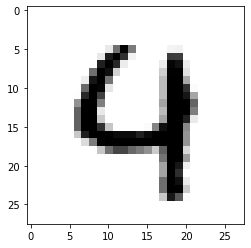

预测值：4
正确值：9


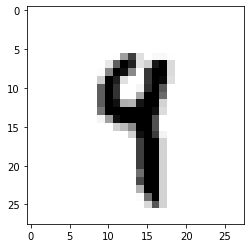

预测值：4
正确值：9


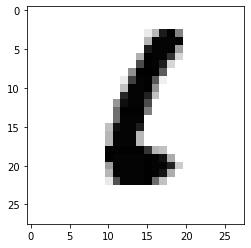

预测值：1
正确值：6


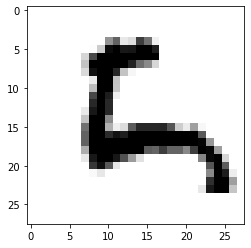

预测值：9
正确值：5


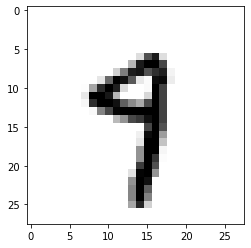

预测值：9
正确值：4


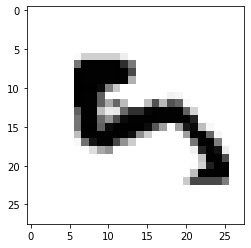

预测值：9
正确值：5


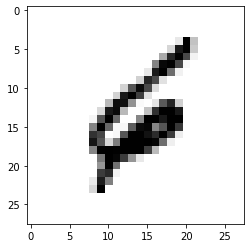

预测值：4
正确值：6


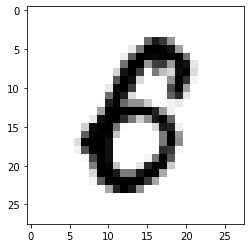

预测值：0
正确值：6


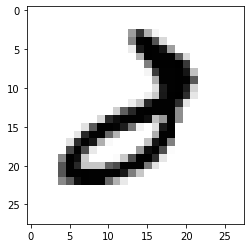

预测值：2
正确值：8


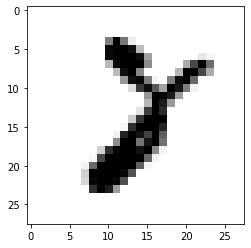

预测值：7
正确值：8


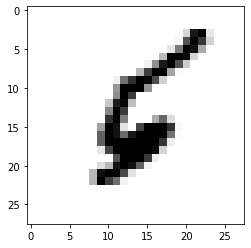

预测值：6
正确值：5


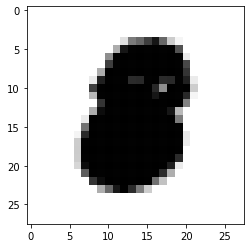

预测值：0
正确值：8


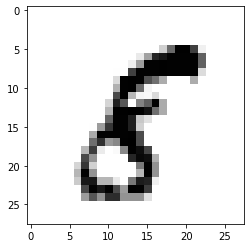

预测值：5
正确值：8


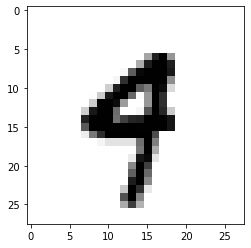

预测值：4
正确值：9


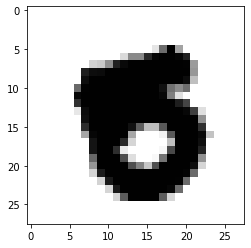

预测值：0
正确值：5


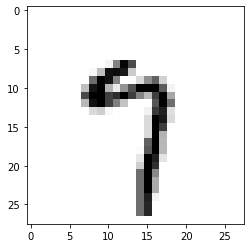

预测值：7
正确值：9


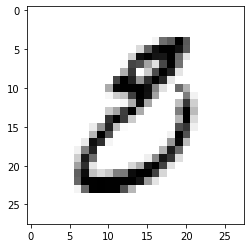

预测值：3
正确值：8


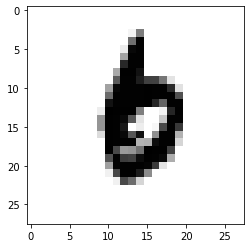

预测值：0
正确值：6


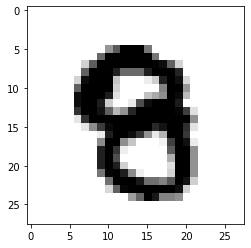

预测值：9
正确值：8


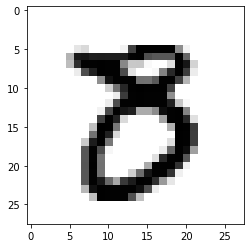

预测值：3
正确值：8


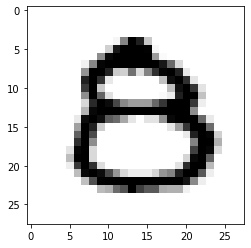

预测值：0
正确值：8


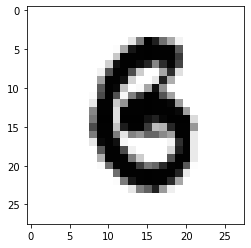

预测值：8
正确值：6


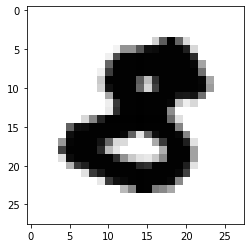

预测值：3
正确值：8


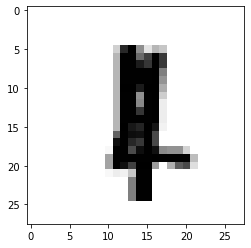

预测值：1
正确值：4


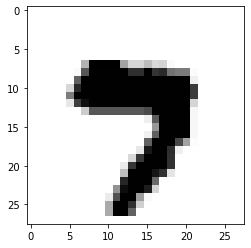

预测值：9
正确值：7


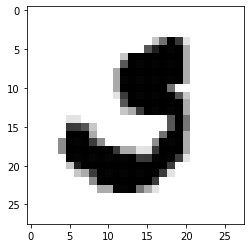

预测值：3
正确值：5


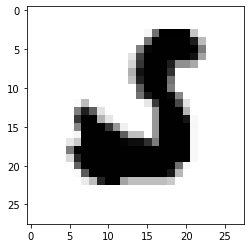

预测值：3
正确值：5


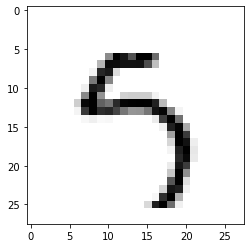

预测值：9
正确值：5


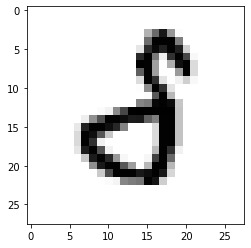

预测值：3
正确值：5


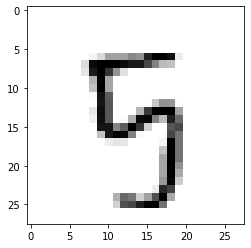

预测值：9
正确值：5


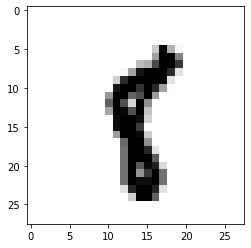

预测值：1
正确值：8


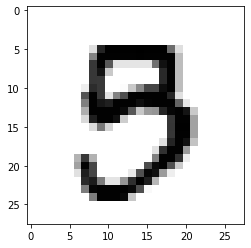

预测值：3
正确值：5


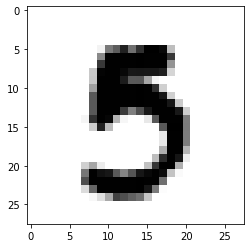

预测值：3
正确值：5


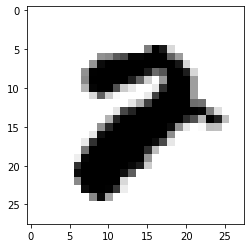

预测值：7
正确值：2


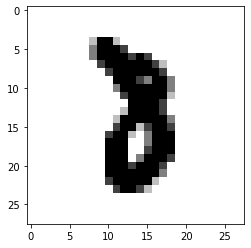

预测值：2
正确值：8


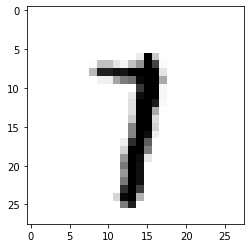

预测值：1
正确值：7


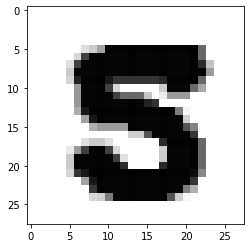

预测值：3
正确值：5


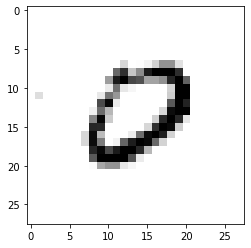

预测值：9
正确值：0


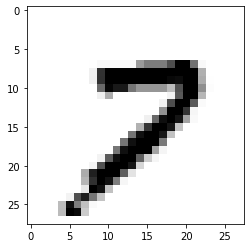

预测值：7
正确值：4


In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
import numpy as np
def imgshow(img):
    #这个是图像显示函数！
    plt.imshow(img,cmap=plt.cm.binary)
    name = "E:/1python深度学习相关/mnist失败案例/"+str(labels)+"---"+str(p)+".png" #本人特殊需要，您可以注释掉！
    plt.savefig(name)
    plt.show()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
a = network.predict(train_images)

for i in range(1,60000):
    #我知道这样写很蠢！
    labels = train_labels[i]
    data = a[i]
    p = np.argmax(data) #获取最大索引
    if labels == p:
        pass
    else:
        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
        imgshow(train_images[i])
        print("预测值："+str(p))
        print("正确值："+str(labels))
        